# Before beginning:
1. Install the Alpaga python module (see documentation)
2. Check that the module is correctly installed (use *print(Alpaga)* and check that it returns an adress to python folder)

In [22]:
# jupyter nbconvert --to python test_software_dev_version.ipynb test_software_dev_version.py
%reset -f
import importlib
import numpy as np
import matplotlib.pyplot as plt
import os 

import pickle
import time
from scipy.optimize import curve_fit

import  matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import clear_output


import sys


import Alpaga # the full package
from Alpaga import file_management
from Alpaga import analyze_run

importlib.reload(Alpaga) # to make sure you have the good version


<module 'Alpaga' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Alpaga\\__init__.py'>

In [23]:
print(Alpaga)
print(Alpaga.analyze_run)


<module 'Alpaga' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Alpaga\\__init__.py'>
<module 'Alpaga.analyze_run' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Alpaga\\analyze_run.py'>


In [24]:
# For the tutorial: 
import Alpaga.Data_tutorial
Dir_tuto_file = os.path.dirname(Alpaga.Data_tutorial.__file__) # where is stored to tutorial files

WORK_DIR = Dir_tuto_file
# WORK_DIR = os.path.join(your_main_dir, second_dir)

# SAVE_DIR = '/home/lama/where_you_want_to_save_your_plots'
SAVE_DIR = '/home/glebreton/Documents/Rapport/Discussion/Presentation_ONLI_LI_Alpaga/'


# Find the files that are to analyse

* alpaga.find_angle_iter_from_dir* fonction find automatically the name-files.

- For non angle-dependent acquisitions, the file names should be:

    *directory + prefixe + _ + iter number + extension*

- For angle-dependent ones :

    *directory + prefixe + _ + angle value + _ +  iter number + extension*



- directiory :  FULL path to the directory where spectra are located. Please note that this directory should contain only one type of spectra.  


- All the file on this directory should have the same 'prefixe' if they have the same extention (usually .dat). 
- N_iter is the integer number of iteration found for this file name. The iterations are used the average the spectra value over several aquisition. 
- The extension is use later on, and is by default *.dat* . 
### To find the file names if there is not angle dependency, use:  

In [25]:
directory = os.path.join(WORK_DIR, 'SHS/Single_acquisition')
prefix_file, N_iter, extention = Alpaga.file_management.find_file_iter_from_dir(directory)
print('The prefix for all the file are: "' + prefix_file + '" with ' + str(N_iter) + ' iter. The extention is: ' + extention)

I will look at file with the extention .dat in the directory C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Single_acquisition for single acquisition. The type of the files should be: prefix_iter.extention
The prefix for all the file are: "Eau_V_120sec" with 3 iter. The extention is: .dat


### To find the file names with angle dependency, use:    

In [26]:
directory = os.path.join(WORK_DIR, 'SHS/Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = Alpaga.file_management.find_angle_iter_from_dir(directory)
print('The prefix for all the file are: "' + prefix_file + '" with ' + str(N_iter) + ' iter. The angle found are ' + str(L_files_angles) + '. The extention is: ' + extention)

I will look at file with the extention .dat in the directory C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
The prefix for all the file are: "Spectre" with 12 iter. The angle found are ['4.0', '8.0', '12.0', '16.0', '20.0', '24.0', '28.0', '32.0', '36.0', '40.0', '44.0', '48.0', '52.0', '56.0', '60.0', '64.0', '68.0', '72.0', '76.0', '80.0', '84.0', '88.0', '92.0', '96.0', '100.0', '104.0', '108.0', '112.0', '116.0', '120.0', '124.0', '128.0', '132.0', '136.0', '140.0', '144.0', '148.0', '152.0', '156.0', '160.0', '164.0', '168.0', '172.0', '176.0', '180.0', '184.0', '188.0']. The extention is: .dat


# Note for the file name construction

By default, the file are built using the function  *alpaga.standard_file_name*.
Some examples are shown here

In [27]:
name_out = Alpaga.file_management.standard_file_name('prefixe', angle='42.0', iteration='4', extention='.dat')
print(name_out)



name_out = Alpaga.file_management.standard_file_name('prefixe', angle=False, iteration='4', extention='.dat')
print(name_out)

name_out = Alpaga.file_management.standard_file_name('prefixe', angle='42.0', iteration=False, extention='.dat')
print(name_out)

name_out = Alpaga.file_management.standard_file_name('prefixe', angle=False, iteration=False, extention='.dat')
print(name_out)

prefixe_42.0_4.dat
prefixe_4.dat
prefixe_42.0.dat
prefixe.dat


In [28]:
def my_own_name_file(prefixe, angle=False, iteration=False, extention='.dat'):
    '''
    Define how to built the name of a file. 
    Please note that the function structure / argument / output should be exactly like that!!!!
    '''
    if isinstance(angle, bool): # case where no angle is given 
        if isinstance(iteration, bool): # case where no iteration is given 
            name = prefixe + extention
        else: # case where an iteration is given 
            name = prefixe + '_aq' + iteration + extention
    else: # case where an angle is given 
        if isinstance(iteration, bool):  # case where no iteration is given 
            name = prefixe + '_' + angle + extention
        else:  # case where an iteration is given 
            name = prefixe + '_' + angle + '_aq' + iteration + extention
    return(name)
    
name_out = my_own_name_file('prefixe', angle='42.0', iteration='4', extention='.dat')
print(name_out)

prefixe_42.0_aq4.dat


Then, in the *alpaga.averaging_and_cleaning* and *alpaga.polarisation_intensity* functions, you should define the optional argument *fct_name* to your define function. For instance:

alpaga.averaging_and_cleaning( ..., fct_name=my_own_name_file, ...)

Note that you cannot use the automatic file finders:  alpaga.find_file_iter_from_dir or alpaga.find_angle_iter_from_dir. You will have to provide the list of L_angle and L_iter.


# Cleaning and averaging

For each angle (or for the all sample if you have only one angle), you can remove the spickes and average over all the iter available using *alpaga.averaging_and_cleaning* function

The inputs are:
- The file names : it should be "directory + prefix"
- N_iter : the number of iter (if not specified, it uses the one found in the previous part; you can select only some inter writing N_iter=[1, 10] for example.
- L_mean_cleaning_n, L_mean_cleaning_evo_max : see documentation for more details
- show_spectra : 'all' to see each treated spectra (to adjust cleaning parameters), 'average' to see only the average one.

The outputs are:
- L_lambda which contains the wavelength values
- L_spectra which containes the cleaned and averaged spectrum over the N_iter available spectra. 

I will look at file with the extention .dat in the directory C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
The averaging will be done for iter from 1 to 12
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_1.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_2.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_3.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_4.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_5.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_6.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_7.dat
C:\ProgramData\Anaconda3\lib\site-pa

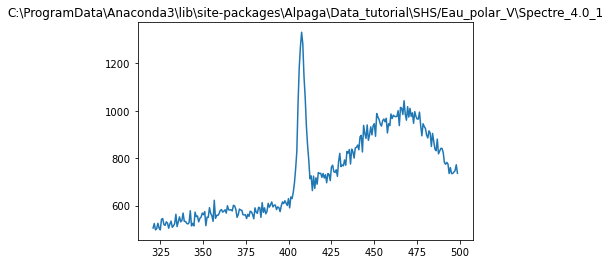

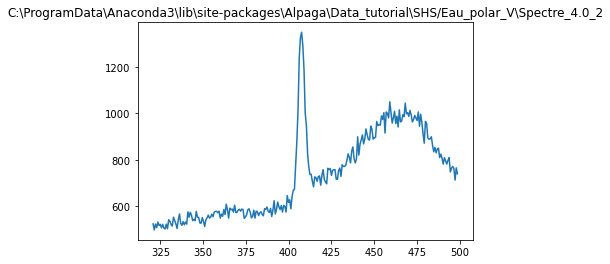

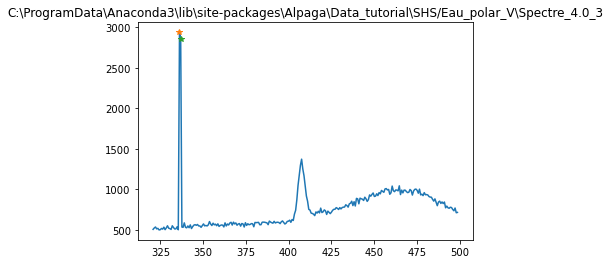

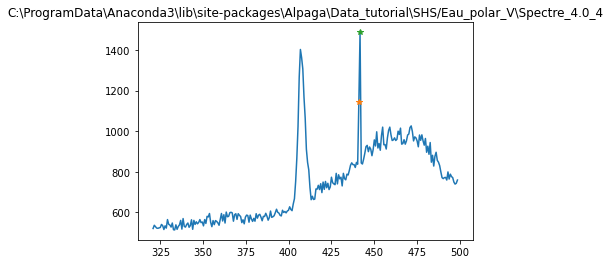

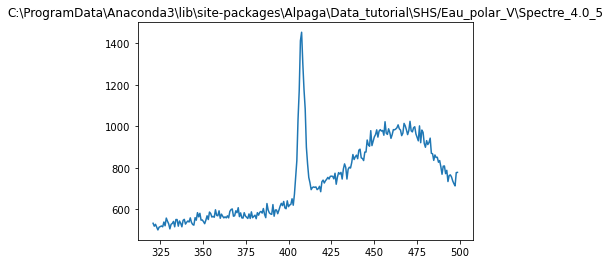

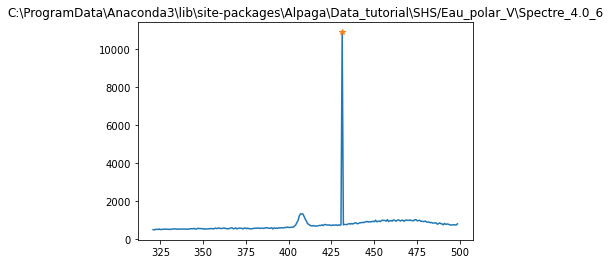

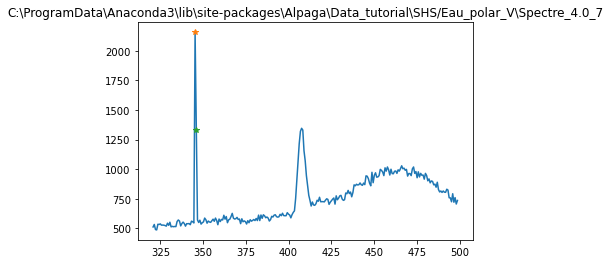

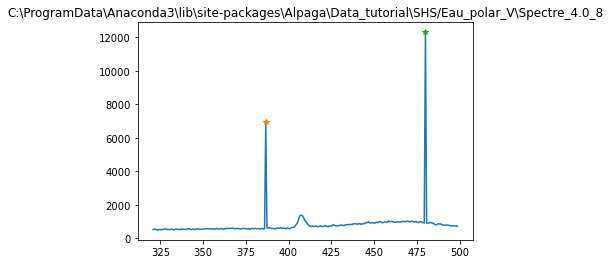

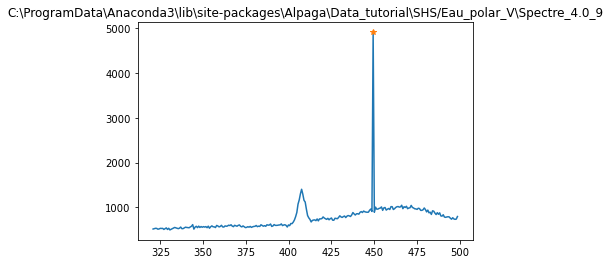

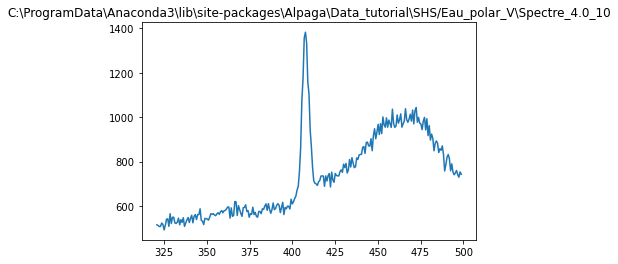

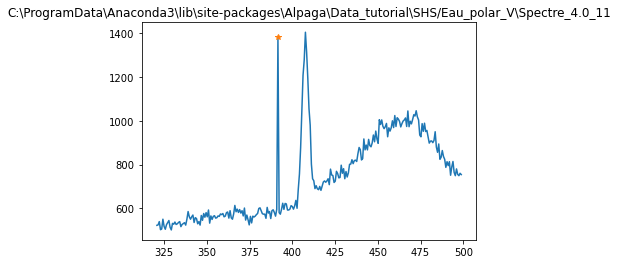

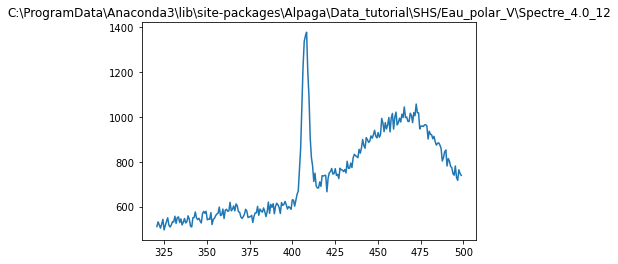

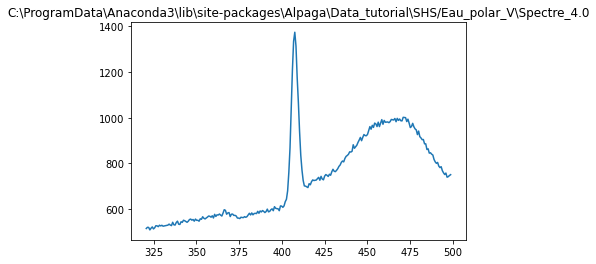

In [29]:
directory = os.path.join(WORK_DIR, 'SHS/Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = Alpaga.file_management.find_angle_iter_from_dir(directory)

names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0]

L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

L_lambda, L_spectra, _ = Alpaga.analyze_run.averaging_and_cleaning(names, N_iter, extention='.dat', 
                                                                   fct_name=Alpaga.file_management.standard_file_name, 
                                                                   type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, 
                                                                   L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra='all', 
                                                                   figure_counter=1)


I will look at file with the extention .dat in the directory C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
The averaging will be done for iter within [1, 10]
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_1.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_10.dat


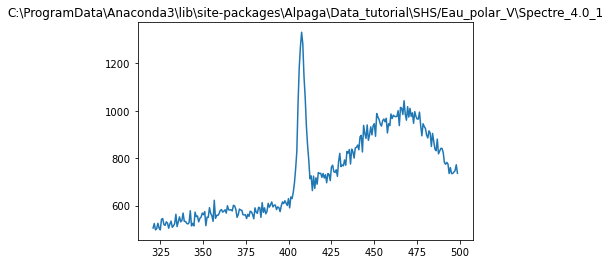

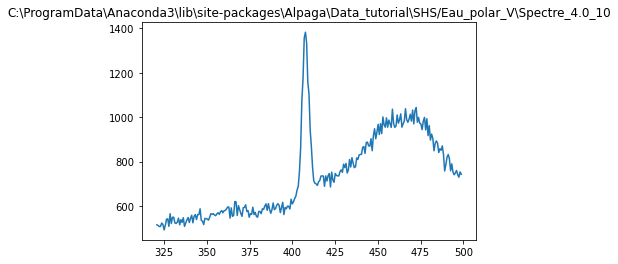

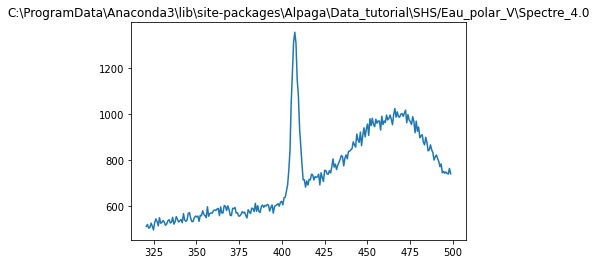

In [30]:
directory = os.path.join(WORK_DIR, 'SHS/Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = Alpaga.file_management.find_angle_iter_from_dir(directory)

names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0] 

N_iter = [1, 10]
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

L_lambda, L_spectra, _ = Alpaga.analyze_run.averaging_and_cleaning(names, N_iter, extention='.dat', type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra='all', figure_counter=1)

I will look at file with the extention .dat in the directory C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
The averaging will be done for iter within [2]
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_2.dat


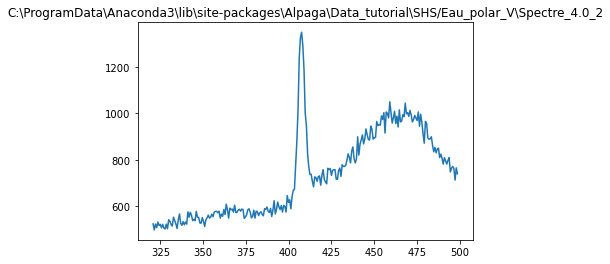

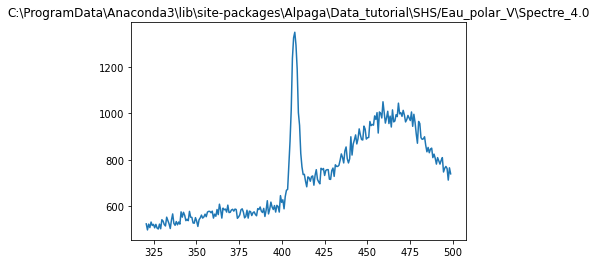

In [31]:
directory = os.path.join(WORK_DIR, 'SHS/Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = Alpaga.file_management.find_angle_iter_from_dir(directory)

names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0]

N_iter = [2]

L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

L_lambda, L_spectra, _ = Alpaga.analyze_run.averaging_and_cleaning(names, N_iter, extention='.dat', type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra='all', figure_counter=1)

# Noise and Fit

I will look at file with the extention .dat in the directory C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_1.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_2.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_3.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_4.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_5.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_6.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_7.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spect

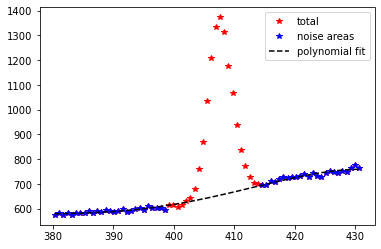

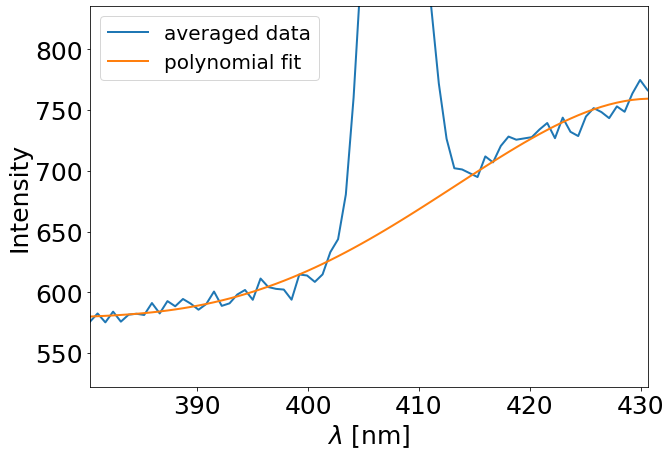

In [33]:
# To check how the noise is removed:
directory = os.path.join(WORK_DIR, 'SHS/Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = Alpaga.file_management.find_angle_iter_from_dir(directory)

names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0]

L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.3, 1.3]

L_lambda, L_spectra, _ = Alpaga.analyze_run.averaging_and_cleaning(names, N_iter, extention='.dat', type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra=False, figure_counter=1)

l_cut = [380, 399, 414, 431]
order_fit_noise = 4

L_x_cleaned, L_y_cleaned, L_y_noise_fit, x_cut, figure_counter = Alpaga.analyze_run.remove_noise(L_lambda, L_spectra, l_cut=l_cut, order_fit_noise=order_fit_noise, return_fit_noise=True, return_boundary=True, show_spectra='all', figure_counter=1)

plt.figure(figure_counter, figsize=(10, 7))
plt.plot(L_lambda, L_spectra, label='averaged data', lw=2)
plt.plot(L_x_cleaned, L_y_noise_fit, label='polynomial fit', lw=2)
plt.xlabel(r'$\lambda$ [nm]', fontsize=25)
plt.xlim([L_x_cleaned[0], L_x_cleaned[-1]])
plt.ylim([np.min(L_y_noise_fit)*0.9, np.max(L_y_noise_fit)*1.1])
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)


print('To get the position of the area, use: x_cut ', x_cut)
print('Check the target and the valued used. Used:', L_lambda[x_cut[0]],  'target (l_cut):', l_cut[0])
print('Check the target and the valued used. Used:', L_lambda[x_cut[1]],  'target (l_cut):', l_cut[1])
print('Check the target and the valued used. Used:', L_lambda[x_cut[2]],  'target (l_cut):', l_cut[2])
print('Check the target and the valued used. Used:', L_lambda[x_cut[3]],  'target (l_cut):', l_cut[3])


print(L_y_noise_fit)

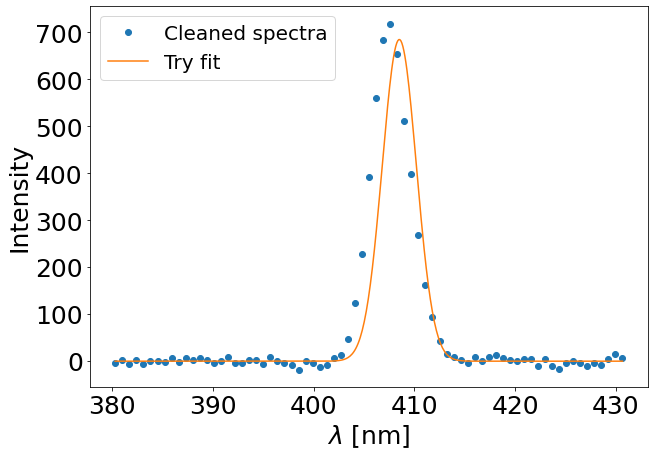

In [12]:
# humain fit: try out!
intensity = 685
lambda_0 = 408.5
omega = 2.4

L_x_for_fit = np.linspace(L_x_cleaned[0], L_x_cleaned[-1], 500)

figure_counter += 1
plt.figure(figure_counter, figsize=(10, 7))
plt.plot(L_x_cleaned, L_y_cleaned, 'o', label='Cleaned spectra', lw=2)
plt.plot(L_x_for_fit, Alpaga.analyze_run.fit_gausse(L_x_for_fit, intensity, lambda_0, omega), label='Try fit', lw=1.5)

plt.xlabel(r'$\lambda$ [nm]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)

To fit the gaussian intensity from the averaged and cleaned spectra, use the function *fit_gaussian_from_noise*: 

The inputs are:

- The 4 value of l_cut defines 3 areas in the spectrum with respect to the lambda values. The first to second the left area, and the third to last the right area and the second to third the middle area. The first and last area should be the 'noise', while the middle area should contain the gaussian and the noise. A polynomial fit is done within the left and right area, WITHOUT the midle part of the spectra, where the gaussian should be located. Therefore, try to set the first and last values where the noise is more or less ''smooth enough to be fited by a polynomial''. And the second and third value not too close to the gaussian, and not too far. Too close would reduce the intensity of the gaussian. Too far could lead to a bad noise fit within the gaussian area.
- The order of the polynom used to fit
- *bounds_fit_gausse* set the bounds parameter for the fit. The first list are the minimum and the second the maximum. The parameter are: intensity, lambda_0 and the width . Please note that you really should not increase to much the width as it would lead to bad fitting for low intensity value.  

I will look at file with the extention .dat in the directory C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_1.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_2.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_3.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_4.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_5.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_6.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_7.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spect

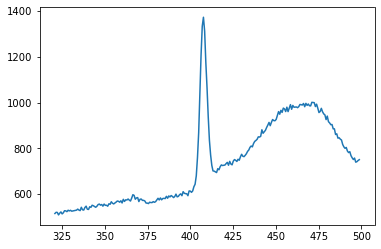

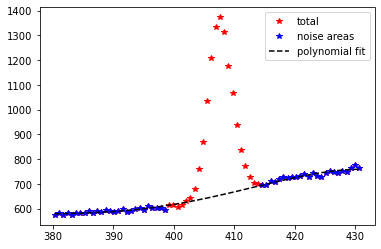

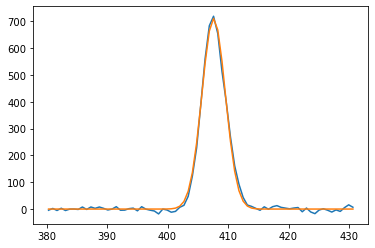

In [13]:
# The noise + gaussian fit
directory = os.path.join(WORK_DIR, 'SHS/Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = Alpaga.file_management.find_angle_iter_from_dir(directory)

names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0]

L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.3, 1.3]

L_lambda, L_spectra, _ = Alpaga.analyze_run.averaging_and_cleaning(names, N_iter, extention='.dat', type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra=False, figure_counter=1)

l_cut = [380, 399, 414, 431]
order_fit_noise = 4


L_para_gauss, L_err, figure_counter = Alpaga.analyze_run.fit_gaussian_from_noise(L_lambda, L_spectra, l_cut=l_cut, order_fit_noise=order_fit_noise, bounds_fit_gausse=([0, 395, 1], [np.inf, 410, 25]), show_spectra='all')

intensity, lambda_0, omega = L_para_gauss
err_intensity, err_lambda_0, err_omega = L_err
print('Intensity:',intensity,' Lambda:',lambda_0, ' Omega: ', omega)
print('Intensity err',err_intensity, 'Lambda err:', err_lambda_0, 'Omega err:', err_omega )


# Polarisation intensity:

In [14]:
directory = os.path.join(WORK_DIR, 'SHS/Eau_polar_V')
prefix_file = False
L_files_angles = False 
N_iter = False
extention = '.dat'

# If working with the 3rd floor setup, change this function for the appropriate one, i.e. alpaga.third_floor_file_name_builder
fct_name = Alpaga.file_management.standard_file_name # For nanoptec and underground
# fct_name = alpaga.third_floor_file_name_builder # For 3rd floor

In [15]:
# Cleaning parameters:
type_cleaning='mean' # default
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

In [16]:
# Noise 
l_cut = [380, 399, 414, 431] # remember that you still need to define meaningfull l_cut parameter even if you use the automatic_l_cut method!!!
order_fit_noise = 4

automatic_l_cut = True
l_cut_n_n2 = [2, 9] # *w0


Several procedures are implemented to obtain the peak intensity :
    - one where the peak is fitted by a gaussian with all the parameters are free. To use this set method_fit_first='fit_gauss'
    - one where the peak is fitted by a gaussian with the central wavelength and gaussian width are fixed (to values obtained as the average value of previous procedure). To use this, set fixed_para_gauss_fit = True and method_fit_second = 'fit_gauss' 
    - one where the integral of the peak is used to exrtact the intensity (central wavelength and gaussian width fixed). To use this, set fixed_para_gauss_fit = True and method_fit_second = 'integral_gauss' 
    
If fixed_para_gauss_fit = True, Alpaga will run 2 times: one to compute the intensity for each polarization angle with free parameters, and another run where lambda_0 and omega_0 are fixed. 

In [17]:
# Fit the gaussian parameters:
bounds_fit_gausse=([0, 404, 1], [np.inf, 410, 3])
lambda_0_ref = 407.7 # useless if you use method_fit_first='fit_gauss'
waist_ref = 2.52

method_fit_first='fit_gauss' # 'integral_gauss' or 'fit_gauss'

fixed_para_gauss_fit = True
method_fit_second = 'both' # or integral_gauss' or 'fit_gauss' or 'both'


In [18]:
# Saving the results:
save_result=True
name_save_result = os.path.join(directory, 'post_prod_results.p')

During the procedure, several graphs will be plotted for each polarization angle: 

- if automatic_l_cut = False

    + The averaged spectra cleaned from the spikes
    
    + The definition of the noise and signal area
    
    + The averaged spectra with the backround removed and the Gaussian fit
    
- automatic_l_cut = True

    + The same 3 plots 
    
    + The averaged spectra cleaned from the spikes (again)
    
    + The definition of the noise and signal area with the automatic definition
    
    + The averaged spectra cleaned from the spikes with this automatic definition of the noise
    
    
Then, if fixed_para_gauss_fit = True, a second run is performed over all the polarization angles.

In [20]:
# waiting_time = False # False or a float
waiting_time = 5 # for instance use this to make Alpaga waits 5 sec between each polarization angle analysis. Doing so, you have more time to check that the fit procedure works.

Angle: 4.0
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_1.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_2.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_3.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_4.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_5.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_6.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_7.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_8.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_9.dat
C:\ProgramData\Anaconda3\lib\site-packages\Alpaga\Data_tutorial\SHS/Eau_polar_V\Spectre_4.0_10.dat
C:\Progr

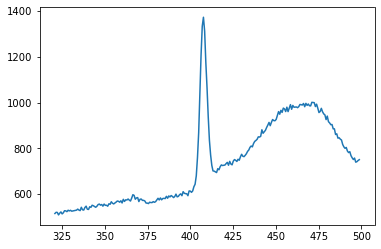

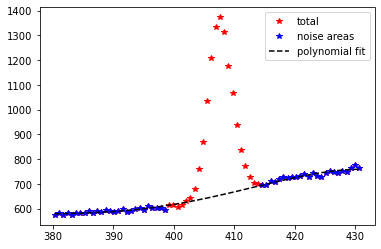

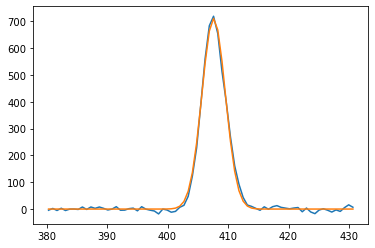

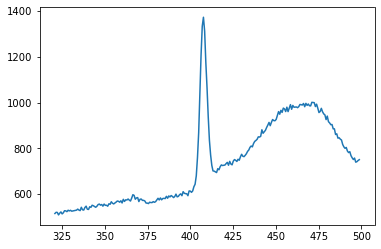

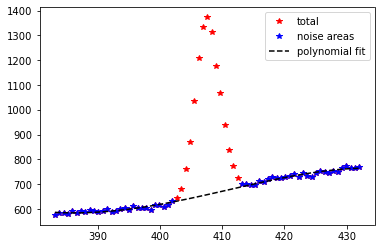

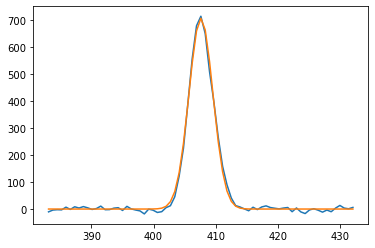

KeyboardInterrupt: 

In [21]:
# The line to make the run: do not change anything here: all the parameter are defined above!
L_post_prod_gauss_fit_integral = Alpaga.analyze_run.polarisation_intensity(directory=directory, prefix_file=prefix_file, L_files_angles=L_files_angles, N_iter=N_iter, extention=extention, fct_name=fct_name, type_cleaning=type_cleaning, L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, automatic_l_cut=automatic_l_cut, l_cut=l_cut, l_cut_n_n2=l_cut_n_n2, order_fit_noise=order_fit_noise, method_fit_first=method_fit_first, bounds_fit_gausse=bounds_fit_gausse, lambda_0_ref=lambda_0_ref, waist_ref=waist_ref, fixed_para_gauss_fit=fixed_para_gauss_fit, method_fit_second=method_fit_second, save_result=save_result, name_save_result=name_save_result, waiting_time=waiting_time)

# Load results and plot:

In [27]:
directory = os.path.join(WORK_DIR, 'SHS/Eau_polar_V')
name_save_result = os.path.join(directory, 'post_prod_results.p')

print(name_save_result)

with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_files_angles = L_post_prod_load['L_files_angles']

L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_polarisation_angle = np.array(L_files_angles_new)*2

L_intensity = L_post_prod_load['L_intensity']
L_intensity_error = L_post_prod_load['L_intensity_error']
L_lambda_0 = L_post_prod_load['L_lambda_0']
L_lambda_0_error = L_post_prod_load['L_lambda_0_error']
L_waist = L_post_prod_load['L_waist']
L_waist_error = L_post_prod_load['L_waist_error']
L_intensity_fit_gauss_fixed_para = L_post_prod_load['L_intensity_fit_gauss_fixed_para']
L_intensity_fit_gauss_fixed_para_error = L_post_prod_load['L_intensity_fit_gauss_fixed_para_error']
L_intensity_integral_gauss_fixed_para = L_post_prod_load['L_intensity_integral_gauss_fixed_para']
L_intensity_integral_gauss_fixed_para_error = L_post_prod_load['L_intensity_integral_gauss_fixed_para_error']



/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/Eau_polar_V/post_prod_results.p


Text(0.5, 1.0, 'Extracted gaussian intensity with respect to the method used')

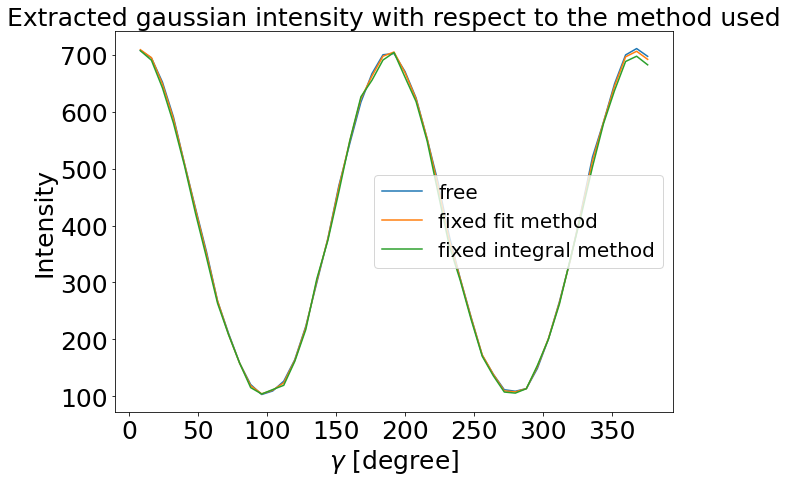

In [28]:
plt.figure(1, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_intensity, label='free')
plt.plot(L_polarisation_angle, L_intensity_fit_gauss_fixed_para, label='fixed fit method')
plt.plot(L_polarisation_angle, L_intensity_integral_gauss_fixed_para, label='fixed integral method')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Extracted gaussian intensity with respect to the method used', fontsize=25)
# plt.savefig(SAVE_DIR+'name_of_the_figure.pdf') # if you want to save the figure, uncomment this line

Text(0.5, 1.0, 'Incertitude relative')

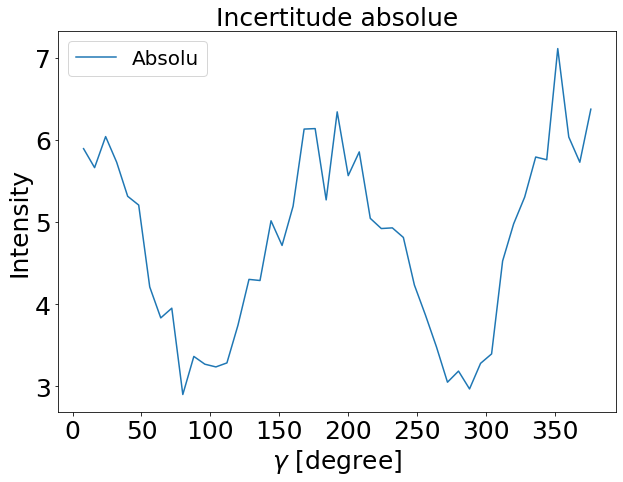

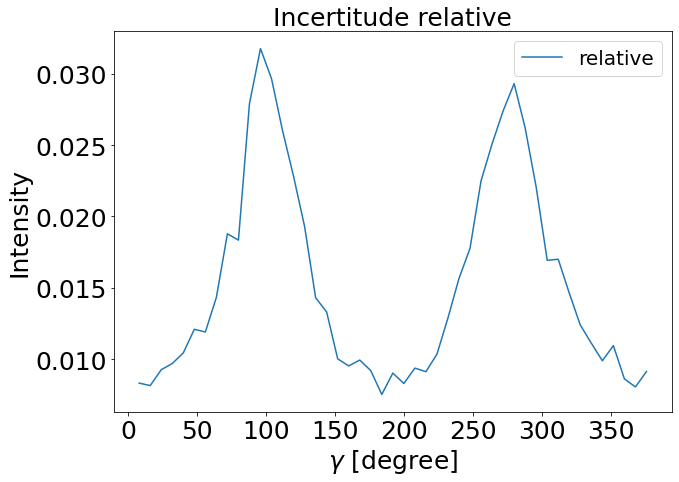

In [29]:
#Incertitude Intensity
plt.figure(1, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_intensity_error, label='Absolu')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Incertitude absolue', fontsize=25)


plt.figure(2, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_intensity_error/L_intensity, label='relative')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Incertitude relative', fontsize=25)

Text(0.5, 1.0, 'Intensity with error')

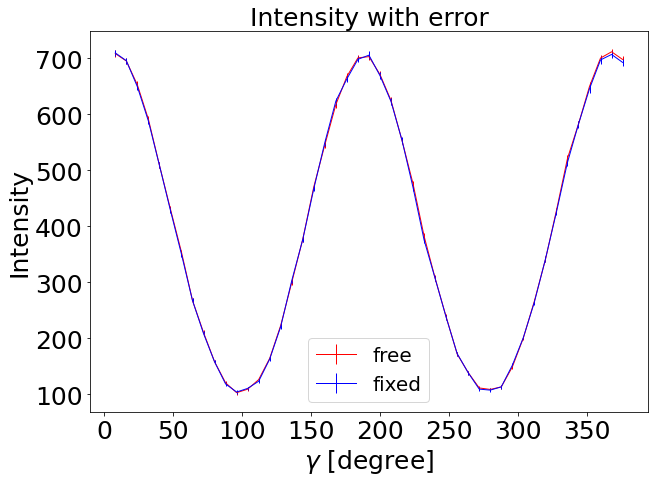

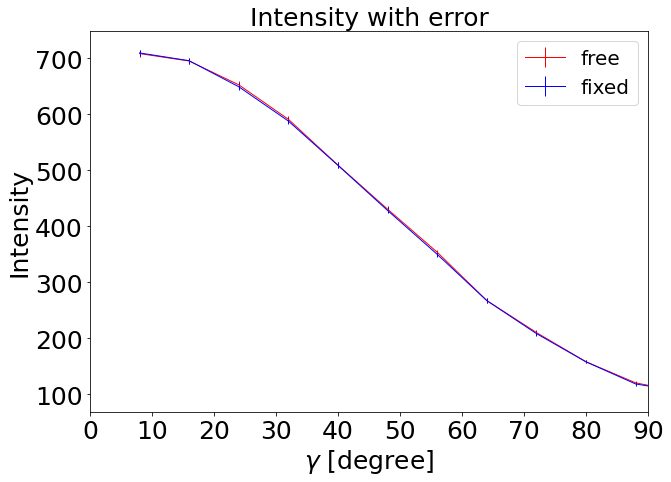

In [30]:
plt.figure(1, figsize=(10, 7))
plt.errorbar(L_polarisation_angle, L_intensity, yerr=L_intensity_error, label='free', fmt = 'r', marker='s', mfc='r',
          ms=0, mew=1, linewidth=1) 
plt.errorbar(L_polarisation_angle, L_intensity_fit_gauss_fixed_para, yerr=L_intensity_fit_gauss_fixed_para_error, label='fixed', fmt = 'b', marker='o', mfc='b',
          ms=0, mew=1, linewidth=1) 
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Intensity with error', fontsize=25)

plt.figure(2, figsize=(10, 7))
plt.errorbar(L_polarisation_angle, L_intensity, yerr=L_intensity_error, label='free', fmt = 'r', marker='s', mfc='r',
          ms=0, mew=1, linewidth=1) 
plt.errorbar(L_polarisation_angle, L_intensity_fit_gauss_fixed_para, yerr=L_intensity_fit_gauss_fixed_para_error, label='fixed', fmt = 'b', marker='o', mfc='b',
          ms=0, mew=1, linewidth=1) 
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.xlim([0, 90])
plt.title('Intensity with error', fontsize=25)


Text(0.5, 1.0, '$\\lambda_0$ fit parameter found for every polarisation angle')

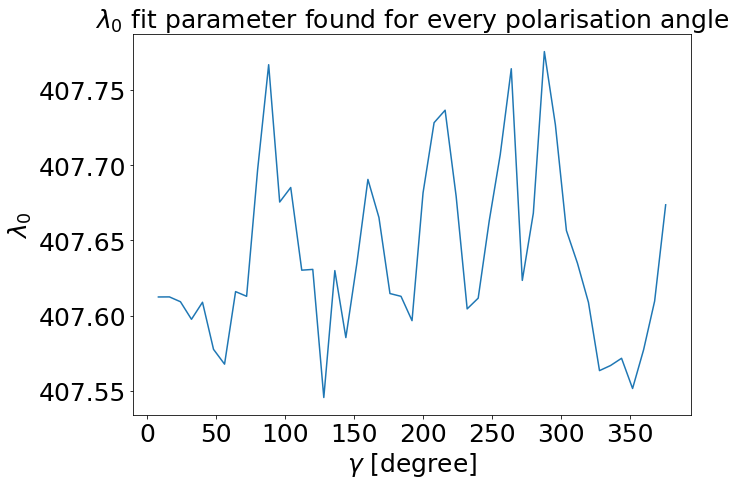

In [31]:
plt.figure(2, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_lambda_0)
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'$\lambda_0$', fontsize=25)
plt.yticks(fontsize=25)
plt.title(r'$\lambda_0$ fit parameter found for every polarisation angle', fontsize=25)


Text(0.5, 1.0, '$\\omega_0$ fit parameter found for every polarisation angle')

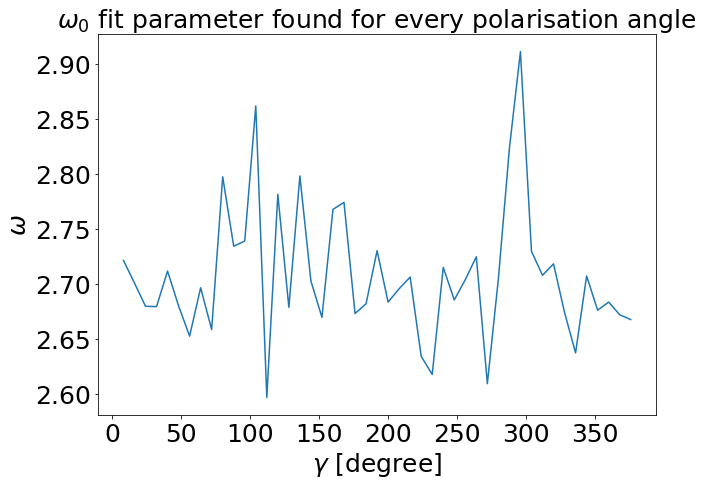

In [32]:
plt.figure(3, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_waist)
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'$\omega$', fontsize=25)
plt.yticks(fontsize=25)
plt.title(r'$\omega_0$ fit parameter found for every polarisation angle', fontsize=25)
